## Sistema Inteligente com Deploy em Streamlit

## Problema e Objetivo

O objetivo primário deste projeto é desenvolver um sistema de previsão que auxilie na identificação de perfis de alto risco para determinadas doenças. O problema central que buscamos resolver é a avaliação de risco e diagnóstico de saúde, visando auxiliar profissionais da área a entender quais fatores (como IMC, pressão arterial, idade) realmente impulsionam o risco de um indivíduo desenvolver uma condição específica (Doença Cardíaca, AVC, etc.), dada a multiplicidade de diagnósticos possíveis. Pretendemos resolver isso por meio de uma abordagem de Machine Learning de duas etapas: primeiro, utilizamos a Clusterização (K-Means) para agrupar os indivíduos em perfis de risco(ex: Alto Risco, Baixo Risco, Risco Intermediário). Em seguida, treinamos um modelo de Classificação Multiclasse (Árvore de Decisão/Random Forest), utilizando a feature de perfil de risco obtida no passo anterior, para prever o diagnóstico mais provável e as regras específicas que levam a essa condição dentro de cada grupo. Esse fluxo garante que a predição final seja mais precisa e, principalmente, interpretável, facilitando a visualização e a tomada de decisão no aplicativo Streamlit.

Para esta atividade, escolhemos o dataset <a href="https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset/data" target="_blank">Healthcare Risk Factors Dataset</a>, disponível no Kaggle.

## Visão Geral

Este conjunto de dados contém 30.000 registros e 20 variáveis relacionadas às condições de saúde de indivíduos, incluindo algumas colunas ruidosas/aleatórias. Ele é adequado para tarefas de classificação em saúde, como prever diabetes, hipertensão e obesidade. Também é útil para modelagem preditiva, como previsão do tempo de permanência hospitalar ou análise de fatores de risco.

O dataset inclui valores ausentes e variáveis de ruído, permitindo praticar limpeza e pré-processamento de dados.


## Detalhes Principais

- Linhas: 30.000  
- Colunas: 20  
- Possui valores ausentes  
- Inclui colunas com ruído proposital  


## Categorias de Atributos

### Demografia
- Age: idade do paciente (anos)  
- Gender: masculino / feminino  

### Condição Médica
- Medical Condition: condição reportada (Diabetes, Hypertension, Asthma, Obesity, Healthy)

### Exames e Métricas Clínicas
- Glucose: nível de glicose  
- Blood Pressure: pressão arterial  
- BMI: índice de massa corporal  
- Oxygen Saturation: saturação de oxigênio  
- Cholesterol: nível de colesterol  
- Triglycerides: nível de triglicerídeos  
- HbA1c: hemoglobina glicada  

### Hábitos e Estilo de Vida
- Smoking: 0 = não fumante, 1 = fumante  
- Alcohol: 0 = não consome, 1 = consome  
- Physical Activity: horas semanais de atividade física  
- Diet Score: pontuação de qualidade da dieta  
- Family History: 0 = sem histórico familiar, 1 = possui  

### Informações Gerais
- LengthOfStay: tempo de permanência no hospital (dias)  
- Stress Level: nível de estresse  
- Sleep Hours: horas de sono por dia  
- random_notes: notas aleatórias  
- noise_col: valores aleatórios sem relação  


## Obtendo o dataset

Os dados foram obtidos através da biblioteca kagglehub, permitindo que seja possível carregar os dados de forma remota e sem depender de armazenamento local.

In [13]:
import kagglehub
import glob
import pandas as pd
import os

path = kagglehub.dataset_download("abdallaahmed77/healthcare-risk-factors-dataset")

caminho = glob.glob(os.path.join(path, '*.csv'))

df = pd.read_csv(caminho[0])

In [14]:
df

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


# EDA - Análise Exploratória de Dados

In [3]:
df.shape

(30000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [5]:
df.drop_duplicates()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


##### Verificando outliers

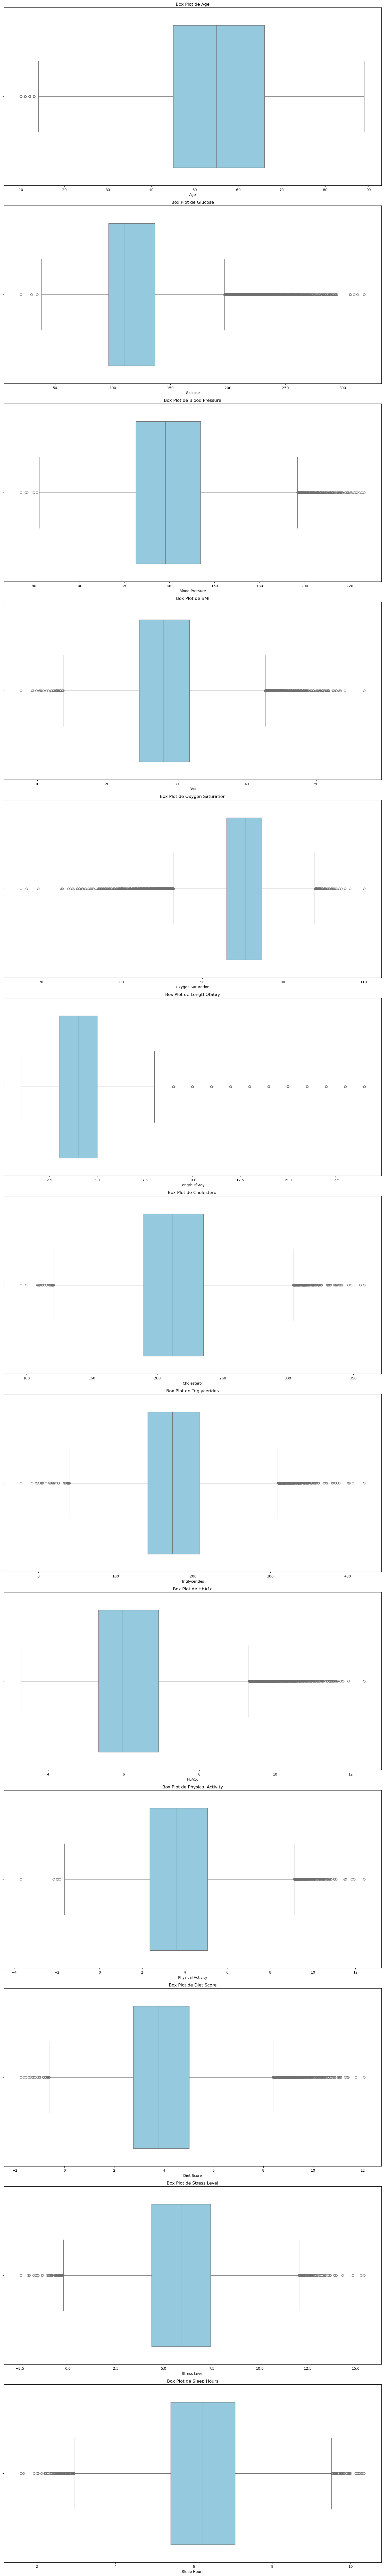

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
colunas_numericas = ['Age','Glucose','Blood Pressure','BMI','Oxygen Saturation','LengthOfStay','Cholesterol','Triglycerides','HbA1c',
'Physical Activity','Diet Score','Stress Level','Sleep Hours',]

nrows = 13
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 100))

axes = axes.flatten()

for i, col in enumerate(colunas_numericas):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot de {col}', fontsize=12)
    axes[i].set_ylabel('')


plt.tight_layout()
plt.show()

Em todas as variáveis existe a presença de outliers. Nesse caso, aparentemente representam condições médicas extremas em vez de erros no dataset

In [7]:
print("Nulos (%):\n", df.isnull().mean().sort_values(ascending=False))

Nulos (%):
 Age                  0.15
Medical Condition    0.15
Glucose              0.15
Blood Pressure       0.15
Gender               0.15
Alcohol              0.00
random_notes         0.00
Sleep Hours          0.00
Stress Level         0.00
Family History       0.00
Diet Score           0.00
Physical Activity    0.00
HbA1c                0.00
Smoking              0.00
Triglycerides        0.00
Cholesterol          0.00
LengthOfStay         0.00
Oxygen Saturation    0.00
BMI                  0.00
noise_col            0.00
dtype: float64


##### Tratamento de valores nulos

As variáveis numéricas foram preenchidas com a mediana, já que praticamente todas as colunas possuem outliers que distorceriam a média

In [17]:
colunas_numericas_nulas = ['Age', 'Glucose', 'Blood Pressure']

for col in colunas_numericas_nulas:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)    


O gênero foi preenchido com a moda 

In [15]:
moda_gender = df['Gender'].mode()[0]

df['Gender'] = df['Gender'].fillna(moda_gender)

Os registros cujo valor da variável alvo eram nulos foram removidas. Escolhemos assim para evitar que o modelo aprendesse padrões "inventados" pelo preenchimento das linhas

In [18]:
df.dropna(subset=['Medical Condition'], inplace=True) 

In [19]:
print("Nulos (%):\n", df.isnull().mean().sort_values(ascending=False))

Nulos (%):
 Age                  0.0
Gender               0.0
random_notes         0.0
Sleep Hours          0.0
Stress Level         0.0
Family History       0.0
Diet Score           0.0
Physical Activity    0.0
Alcohol              0.0
Smoking              0.0
HbA1c                0.0
Triglycerides        0.0
Cholesterol          0.0
LengthOfStay         0.0
Oxygen Saturation    0.0
BMI                  0.0
Blood Pressure       0.0
Glucose              0.0
Medical Condition    0.0
noise_col            0.0
dtype: float64


In [20]:
nome_do_arquivo = 'fatores_risco.csv'
df.to_csv(nome_do_arquivo, index=False)

##### Realizando caping nos outliers 

Para evitar que os outliers afetem o resultado do K-means, criammos outro dataframe em que os outliers estão mais próximos possível do valor interquartil mais extremo

In [14]:
def treat_outliers_iqr(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(lambda x: limite_superior if x > limite_superior else x)
    
    df[column] = df[column].apply(lambda x: limite_inferior if x < limite_inferior else x)
    
    return df

for col in colunas_numericas:
    df_cap = treat_outliers_iqr(df, col)

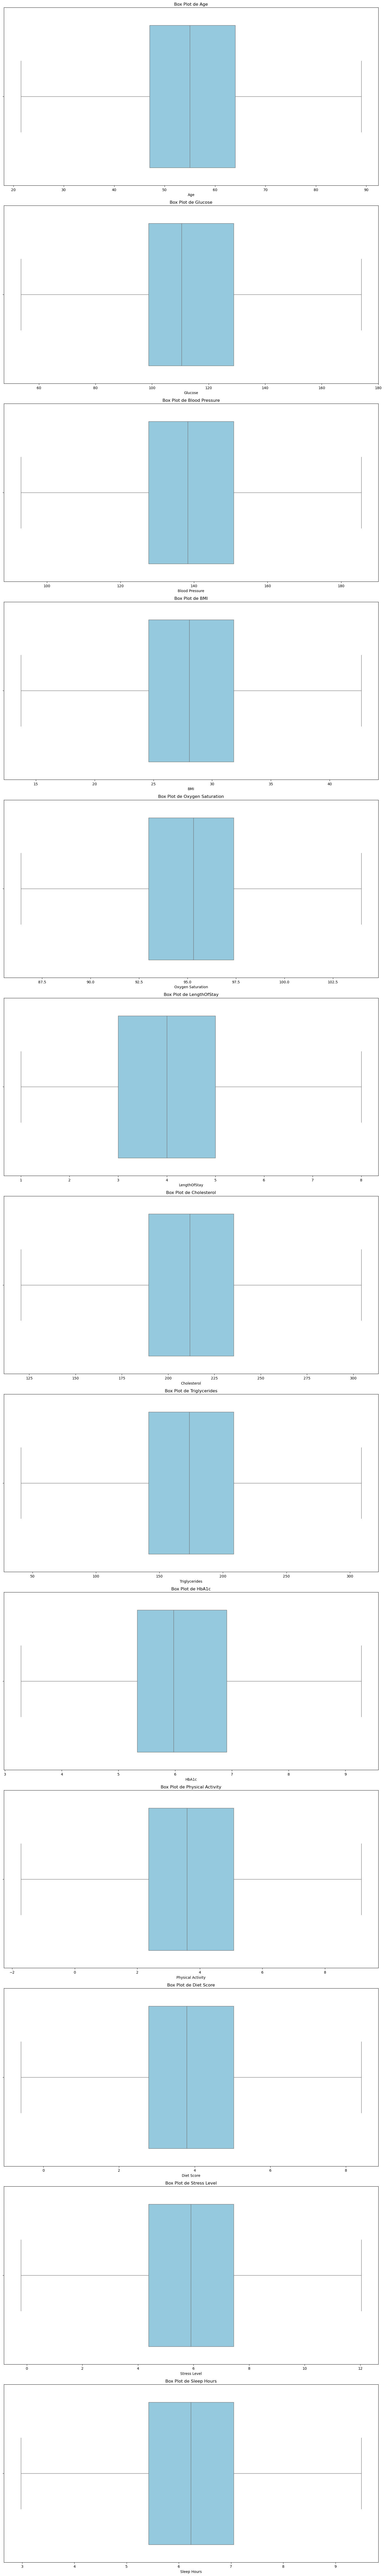

In [15]:
nrows = 13
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 100))

axes = axes.flatten()

for i, col in enumerate(colunas_numericas):
    sns.boxplot(x=df_cap[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot de {col}', fontsize=12)
    axes[i].set_ylabel('')


plt.tight_layout()
plt.show()

Até o momento, realizamos as etapas críticas de pré-processamento para garantir que os dados estejam limpos e estáveis para a Clusterização (K-Means). Inicialmente, removemos 4500 linhas que possuíam valores nulos na variável-alvo Medical Condition para preservar a integridade do diagnóstico final. Em seguida, tratamos os valores nulos nas features numéricas usando a mediana e a variável Gender utilizando a moda. Por último, aplicamos a técnica de Caping nas colunas numéricas, pois todas continham outliers, utilizando a regra do 1.5xIQR, para mitigar o impacto de casos médicos extremos no K-Means, garantindo que o modelo de Clusterização não seja distorcido por valores muito distantes. 

##### Observando correlações

In [16]:
df_eda = df.copy()

df_eda['Medical_Condition_Encoded'] = df_eda['Medical Condition'].astype('category').cat.codes

df_eda['Gender_Encoded'] = df_eda['Gender'].astype('category').cat.codes

df_eda['Smoking'] = df_eda['Smoking'].astype('int64')
df_eda['Alcohol'] = df_eda['Alcohol'].astype('int64')
df_eda['Family History'] = df_eda['Family History'].astype('int64')


features_numericas = [
    'Age', 'Glucose', 'Blood Pressure', 'BMI', 'Cholesterol', 
    'Triglycerides', 'HbA1c', 'Stress Level', 'Sleep Hours', 
    'Gender_Encoded', 'Smoking', 'Alcohol', 'Family History',
    'Medical_Condition_Encoded', 'Oxygen Saturation','Physical Activity', 'Diet Score'
]


corr_matrix = df_eda[features_numericas].corr()

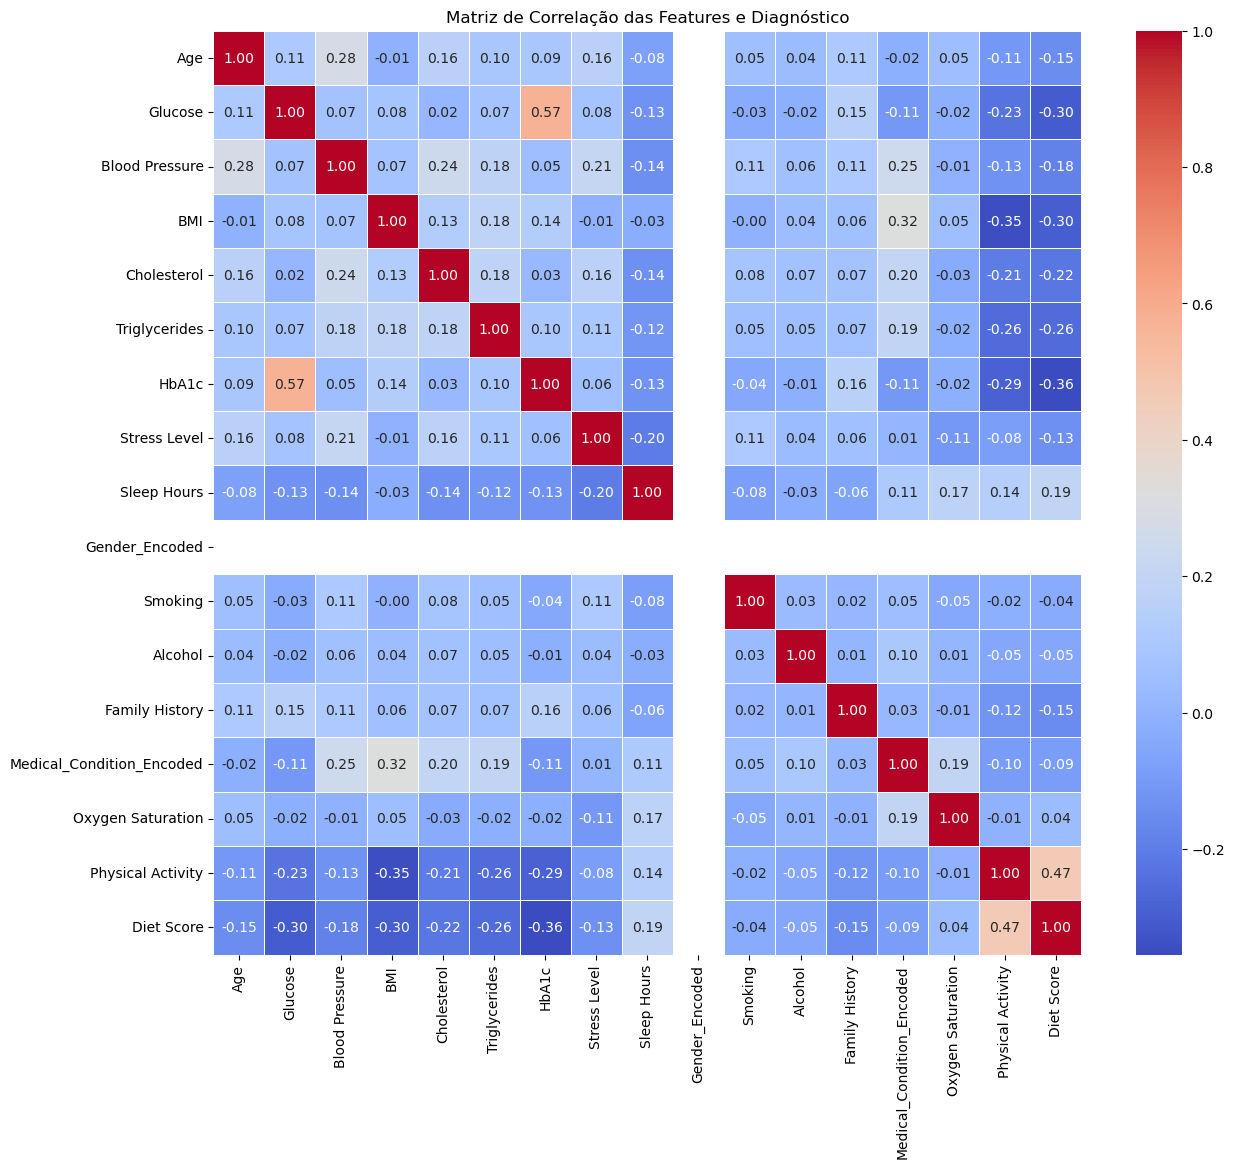

In [17]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Features e Diagnóstico')
plt.show()

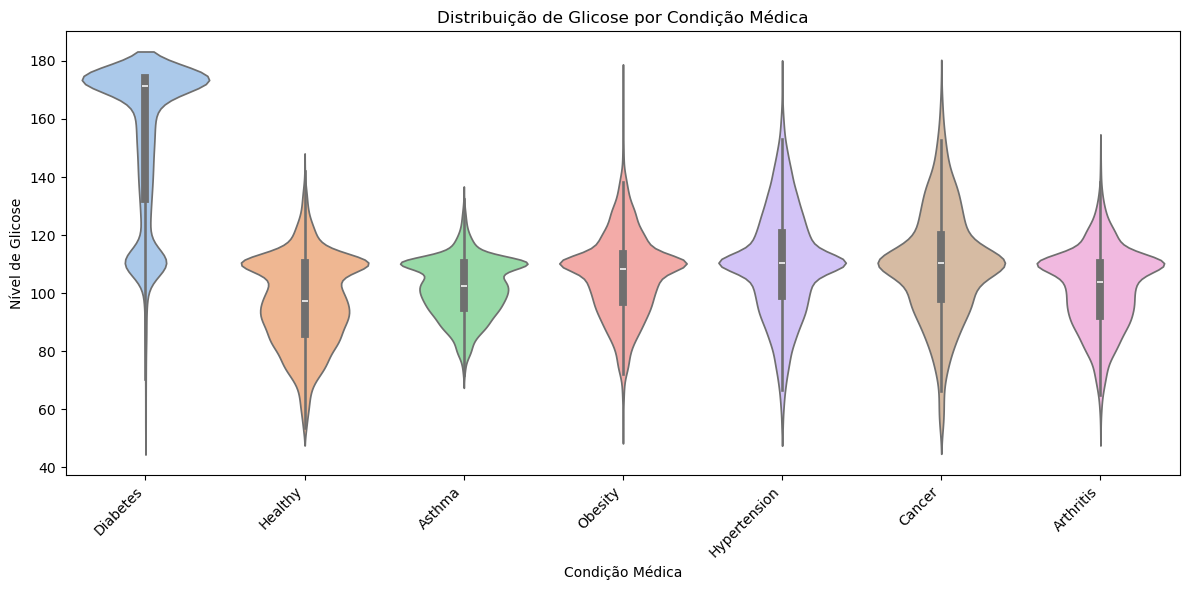

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Medical Condition', y='Glucose', data=df_eda, hue='Medical Condition', palette='pastel', legend=False)
plt.title('Distribuição de Glicose por Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Nível de Glicose')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

O gráfico de violino mostra que a distribuição de glicose está mais concentrada e dentro da faixa normal no grupo saudável, e mais baixa e estreita no grupo "Asthma", enquanto o grupo "diabetes" exibe a maior amplitude e a maior concentração de níveis de glicose na parte superior, refletindo a natureza da doença. Os grupos com condições como obesidade, hipertensão, câncer," e artrite apresentam medianas de glicose visivelmente mais elevadas e distribuições mais largas do que o grupo saudável, sugerindo uma forte correlação entre essas doenças e a prevalência de níveis de glicose elevados, possivelmente indicando risco metabólico aumentado ou a influência de comorbidades e tratamentos.

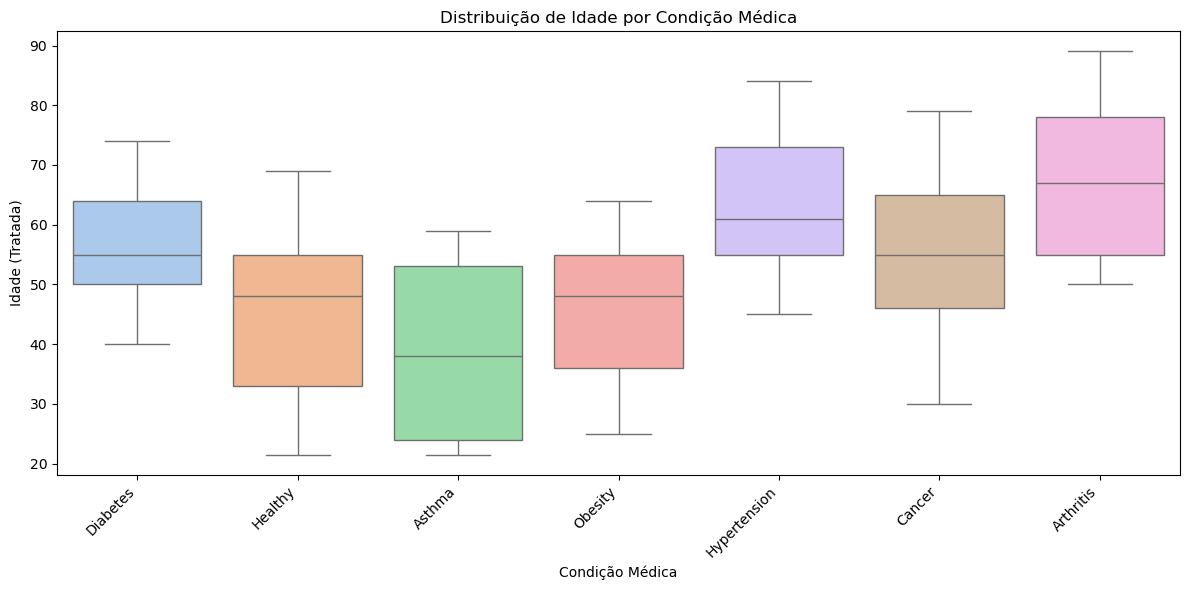

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medical Condition', y='Age', data=df_eda, hue='Medical Condition', palette='pastel', legend=False) 
plt.title('Distribuição de Idade por Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Idade (Tratada)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O gráfico de Distribuição de Idade por Condição Médica mostra que Asma é a condição associada ao grupo mais jovem, com a mediana de Idade mais baixa, enquanto Artrite, Hipertensão e Câncer afetam predominantemente os mais velhos, exibindo as medianas mais altas, o que é esperado para doenças ligadas ao envelhecimento. Já os grupos Healthy e Obesidade possuem distribuições e medianas de Idade semelhantes, indicando uma faixa etária mais ampla, e Diabetes fica um pouco acima. Em resumo, a Idade é um fator fortemente distinto entre as Condições Médicas, com Asma no extremo mais jovem e Artrite no extremo mais velho.

In [20]:
import pandas as pd

contagem_diagnostico_por_genero = df_eda.groupby('Gender')['Medical Condition'].value_counts()

print("Contagem Agrupada de Diagnósticos por Gênero:")
print(contagem_diagnostico_por_genero)

Contagem Agrupada de Diagnósticos por Gênero:
Series([], Name: count, dtype: int64)


In [21]:
contagemgen=df_eda['Gender'].value_counts()
print(contagemgen)

Series([], Name: count, dtype: int64)


In [22]:
proporcao_diagnostico_por_genero = df_eda.groupby('Gender')['Medical Condition'].value_counts(normalize=True)
proporcao_diagnostico_por_genero_percentual = proporcao_diagnostico_por_genero * 100

print("Proporção Percentual de Diagnósticos em Relação ao Total de Pessoas do Mesmo Gênero:")
print(proporcao_diagnostico_por_genero_percentual.round(2).astype(str) + '%')

Proporção Percentual de Diagnósticos em Relação ao Total de Pessoas do Mesmo Gênero:
Series([], Name: proportion, dtype: object)


A análise da tabela de Proporção Percentual de Diagnósticos por Gênero mostra que tanto para o Feminino quanto para o Masculino, as condições mais prevalentes são Hipertensão e Diabetes, seguidas por Obesidade, com menos de 13% em ambos os gêneros na categoria Healthy. As proporções entre os gêneros são próximas em todas as categorias, com o Masculino apresentando prevalência ligeiramente maior em Hipertensão e Diabetes, enquanto o Feminino apresenta ligeira vantagem em Obesidade e Artrite, indicando que a carga dessas doenças crônicas é distribuída de forma quase igualitária entre homens e mulheres neste conjunto de dados.

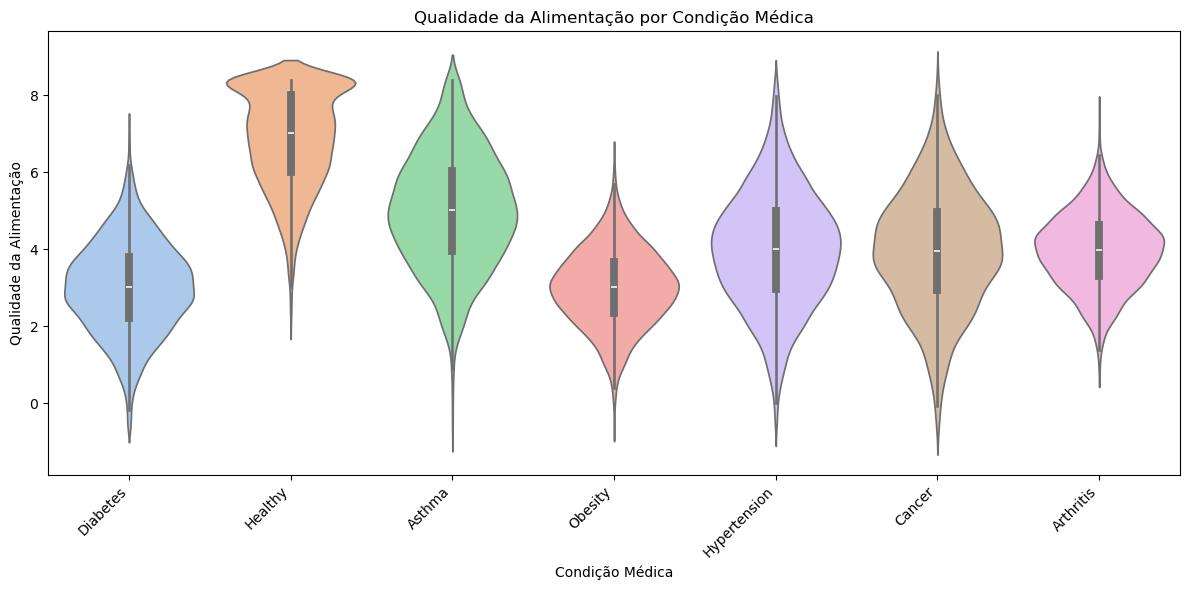

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Medical Condition', y='Diet Score', data=df_eda, hue='Medical Condition', palette='pastel', legend=False)
plt.title('Qualidade da Alimentação por Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Qualidade da Alimentação')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


O gráfico de violino da Distribuição de Qualidade da Alimentação por Condição Médica (onde pontuações mais altas indicam melhor qualidade) mostra que o grupo Saudável possui a melhor qualidade de alimentação, com a maior mediana e a maior concentração de dados na faixa superior da escala, sendo a distribuição mais estreita e alta. Em contraste, os grupos com condições crônicas como Diabetes e Obesidade exibem as medianas mais baixas e distribuições que se concentram na faixa intermediária-baixa (entre 2 e 4), sugerindo uma qualidade de alimentação inferior. Os grupos Asma,  Hipertensão, Câncer e Artrite apresentam medianas intermediárias e distribuições mais amplas, com o Cancer e Hypertension mostrando uma dispersão maior, mas com concentrações que indicam uma qualidade de alimentação melhor que a de Diabetes ou Obesidade, mas ainda inferior à do grupo Healthy.

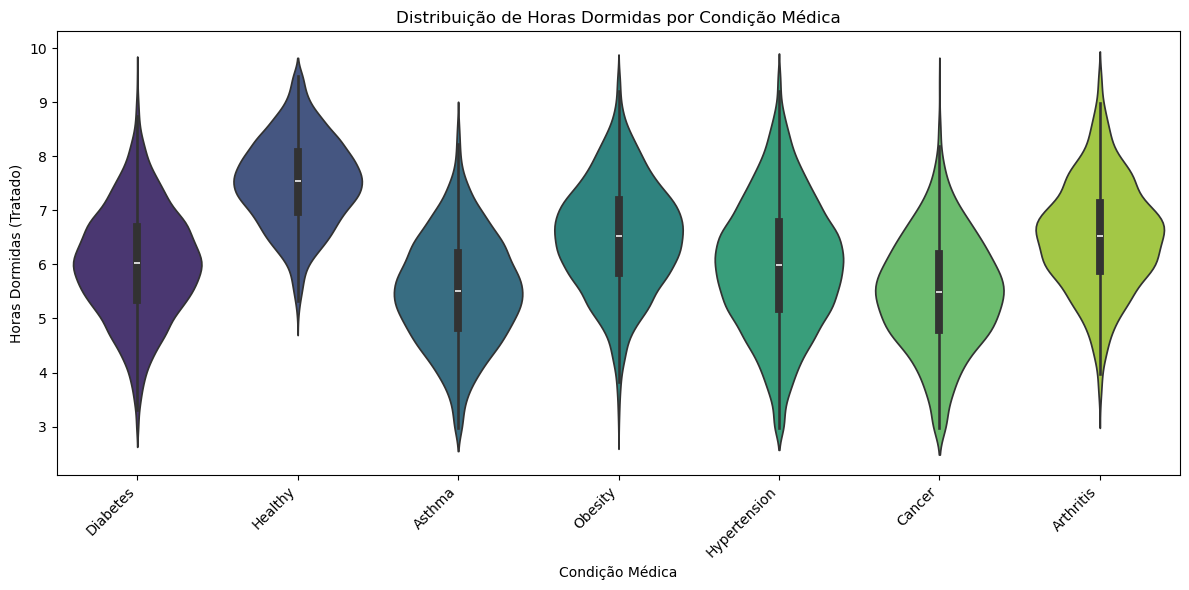

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Medical Condition', y='Sleep Hours', data=df_eda, hue='Medical Condition', palette='viridis')
plt.title('Distribuição de Horas Dormidas por Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Horas Dormidas (Tratado)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O gráfico de violino da Distribuição de Horas Dormidas por Condição Médica revela que, apesar de todos os grupos terem uma ampla faixa de horas de sono (de 3 a 10 horas), o grupo Healthy (Saudável) apresenta a mediana e a concentração de dados mais altas (perto de 7-8 horas), indicando uma média de sono melhor. Em contraste, o grupo Diabetes é o que possui a mediana mais baixa e uma distribuição notavelmente bimodal, com um pico significativo em menos de 6 horas, sugerindo que uma parcela considerável desse grupo dorme pouco. Os demais grupos, como Asma, Obesidade, Hipertensão, Câncer e Artrite, concentram suas medianas entre 6 e 7 horas de sono, com distribuições parecidas, indicando que a maioria das condições crônicas, embora apresentem medianas menores que o grupo Healthy, mantêm uma faixa de sono relativamente regular.

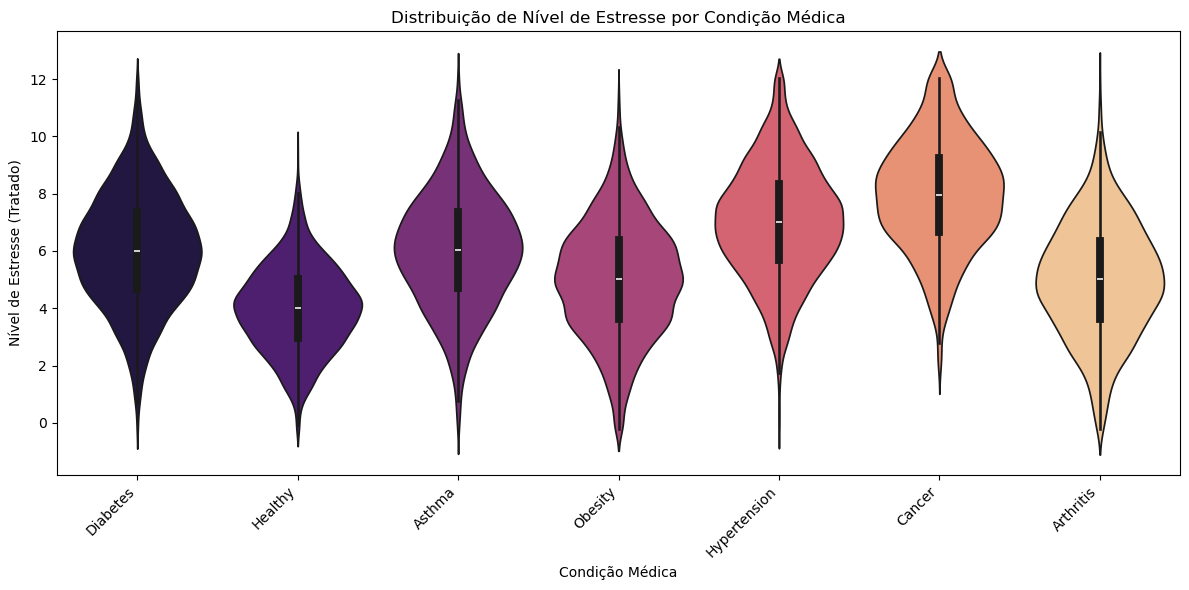

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Medical Condition', y='Stress Level', data=df_eda, hue='Medical Condition', palette='magma')
plt.title('Distribuição de Nível de Estresse por Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Nível de Estresse (Tratado)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


O gráfico de violino da Distribuição de Nível de Estresse por Condição Médica demonstra que o grupo Saudável apresenta o menor Nível de Estresse. Os grupos com condições crônicas de saúde tendem a ter Níveis de Estresse  mais altos, especialmente Câncer, que exibe a mediana mais elevada e uma concentração notável na faixa de alto estresse (acima de 8), seguido de perto por Hipertensão, Diabetes e Asma, cujas medianas são altas e as distribuições são largas, indicando uma alta prevalência de estresse elevado. Por fim, os grupos Obesidade e Artrite possuem medianas intermediárias, mas ainda assim visivelmente maiores que a do grupo Healthy, reforçando a conclusão de que a presença de uma condição médica está fortemente associada a um maior Nível de Estresse.

In [26]:
contagemgen=df_eda['Family History'].value_counts()
print(contagemgen)

proporcao_diagnostico_familiar = df_eda.groupby('Family History')['Medical Condition'].value_counts(normalize=True)
proporcao_diagnostico_familiar_percentual = proporcao_diagnostico_familiar * 100

print("Proporção Percentual de Diagnósticos em Relação ao Histórico Familiar:")
print(proporcao_diagnostico_familiar_percentual.round(2).astype(str) + '%')

Family History
0    14361
1    11139
Name: count, dtype: int64
Proporção Percentual de Diagnósticos em Relação ao Histórico Familiar:
Family History  Medical Condition
0               Hypertension         24.87%
                Diabetes             18.26%
                Healthy              17.04%
                Obesity              16.27%
                Asthma                9.92%
                Arthritis             7.45%
                Cancer                 6.2%
1               Diabetes             34.07%
                Hypertension         31.86%
                Obesity              13.65%
                Arthritis             6.52%
                Asthma                 5.5%
                Healthy               5.31%
                Cancer                3.08%
Name: proportion, dtype: object


A tabela que mostra a proporção de Condições Médicas em relação ao Histórico Familiar (0 para ausente e 1 para presente) demonstra uma forte influência genética no risco de doença, pois a presença de histórico está ligada a um aumento drástico na proporção de Diabetes (subindo de 18.26% para 34.07%) e Hipertensão (de 24.87% para 31.86%), enquanto a proporção de pessoas na categoria Saudável despenca de 17.04% para apenas 5.31%. Curiosamente, as proporções de Câncer e Obesidade são menores no grupo com Histórico Familiar presente, o que pode indicar que, neste conjunto de dados, o Histórico Familiar está mais relacionado a doenças metabólicas do que a essas outras condições específicas.

In [27]:
contagemgen=df_eda['Smoking'].value_counts()
print(contagemgen)

proporcao_diagnostico_fumante = df_eda.groupby('Smoking')['Medical Condition'].value_counts(normalize=True)
proporcao_diagnostico_fumante_percentual = proporcao_diagnostico_fumante * 100

print("Proporção Percentual de Diagnósticos em Relação ao Total de Fumantes:")
print(proporcao_diagnostico_fumante_percentual.round(2).astype(str) + '%')

Smoking
0    18384
1     7116
Name: count, dtype: int64
Proporção Percentual de Diagnósticos em Relação ao Total de Fumantes:
Smoking  Medical Condition
0        Diabetes             27.64%
         Hypertension         22.82%
         Obesity              15.92%
         Healthy              14.76%
         Arthritis             7.83%
         Asthma                7.64%
         Cancer                3.39%
1        Hypertension          41.1%
         Diabetes             18.77%
         Obesity              13.07%
         Asthma                 8.9%
         Cancer                8.59%
         Arthritis              5.0%
         Healthy               4.57%
Name: proportion, dtype: object


A tabela que analisa a proporção de Condições Médicas em relação ao Tabagismo estabelece o fumo como um fator de risco, elevando a proporção de Hipertensão para 41.1% no grupo de fumantes (comparado a 22.82% nos não fumantes) e triplicando os casos de Câncer (de 3.39% para 8.59%), além de reduzir drasticamente a proporção de Healthy para apenas 4.57%. No entanto, há uma correlação inversa para o Diabetes, que é mais prevalente no grupo de Não Fumantes, o que sugere que outros fatores de risco (como a idade, o que poderia ser verificado no gráfico de idade) ou vieses no estudo podem estar mascarando a relação direta entre fumo e Diabetes.

In [28]:
contagemgen=df['Alcohol'].value_counts()
print(contagemgen)

proporcao_diagnostico_fumante = df_eda.groupby('Alcohol')['Medical Condition'].value_counts(normalize=True)
proporcao_diagnostico_fumante_percentual = proporcao_diagnostico_fumante * 100

print("Proporção Percentual de Diagnósticos em Relação ao Total de Pessoas que consomem álcool:")
print(proporcao_diagnostico_fumante_percentual.round(2).astype(str) + '%')

Alcohol
0    19393
1     6107
Name: count, dtype: int64
Proporção Percentual de Diagnósticos em Relação ao Total de Pessoas que consomem álcool:
Alcohol  Medical Condition
0        Diabetes             26.45%
         Hypertension         25.55%
         Obesity              13.84%
         Healthy              13.27%
         Asthma                 9.1%
         Arthritis             7.35%
         Cancer                4.45%
1        Hypertension         35.47%
         Diabetes             21.09%
         Obesity              19.21%
         Healthy               7.61%
         Arthritis             6.07%
         Cancer                6.07%
         Asthma                4.47%
Name: proportion, dtype: object


A análise da proporção de diagnósticos demonstra que o consumo de álcool está fortemente associado a uma elevação drástica na prevalência de Hipertensão, que salta de 25.55% nos não consumidores para 35.47% nos consumidores, e de Obesidade, que aumenta de 13.84% para 19.21%, além de quase duplicar os casos de Câncer. A proporção de pessoas na categoria Saudável é reduzida quase pela metade no grupo consumidor de álcool, reforçando o risco. Uma exceção notável é o Diabetes, que é a condição mais prevalente entre os Não Consumidores (26.45%), mas cuja proporção cai para 21.09% nos consumidores de álcool, indicando, assim como no caso do tabagismo, uma interação complexa com outros fatores (como a idade ou a gravidade da doença) que exige análise mais aprofundada.

In [35]:
contagem_casos = df['Medical Condition'].value_counts()
print(contagem_casos)

Medical Condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64


# K-means

Após a realização da Análise Exploratória inicial, iniciamos a clusterização do nosso dataset

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['Gender_Encoded'] = df['Gender'].astype('category').cat.codes

features_para_kmeans = [
    'Age', 'Gender_Encoded', 'Glucose', 'Blood Pressure', 'BMI', 
    'Oxygen Saturation', 'LengthOfStay', 'Cholesterol', 'Triglycerides', 
    'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score', 
    'Family History', 'Stress Level', 'Sleep Hours'
]

X = df[features_para_kmeans].copy() 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Elbow Method para determinar o valor de K

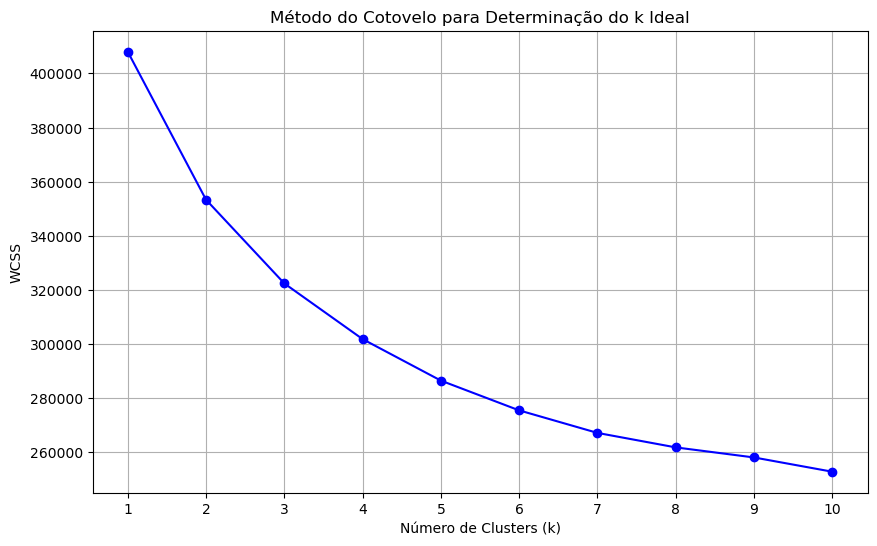

In [30]:
wcss = [] 
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Método do Cotovelo para Determinação do k Ideal')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

No gráfico podemos observar que o momento onde a inércia deixa de variar bruscamente é quando k = 4

In [31]:
k_ideal = 4

kmeans_final = KMeans(n_clusters=k_ideal, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [32]:
df['risk_profile_cluster'] = cluster_labels

print("\nDistribuição de Membros nos Perfis de Risco:")
print(df['risk_profile_cluster'].value_counts().sort_index())


Distribuição de Membros nos Perfis de Risco:
risk_profile_cluster
0    5861
1    5917
2    9685
3    4037
Name: count, dtype: int64


In [76]:
cluster_profile = df.groupby('risk_profile_cluster')[features_para_kmeans].mean()

cluster_profile_transposed = cluster_profile.T.round(2)

print("Tabela de Caracterização dos Perfis de Risco (Médias por Cluster):")
print(cluster_profile_transposed)

Tabela de Caracterização dos Perfis de Risco (Médias por Cluster):
risk_profile_cluster       0       1       2       3
Age                    50.35   60.99   56.80   43.55
Gender_Encoded          0.42    0.42    0.43    0.41
Glucose               106.10  108.42  157.35   98.05
Blood Pressure        135.22  150.07  139.39  123.17
BMI                    33.33   26.96   28.95   24.02
Oxygen Saturation      95.98   94.23   94.94   95.73
LengthOfStay            3.57    4.51    5.66    1.99
Cholesterol           218.09  225.13  208.62  182.75
Triglycerides         194.53  181.88  178.50  135.57
HbA1c                   6.00    5.80    8.01    5.26
Smoking                 0.20    0.43    0.20    0.13
Alcohol                 0.28    0.29    0.19    0.14
Physical Activity       2.31    4.06    3.00    6.55
Diet Score              3.21    4.08    2.99    6.53
Family History          0.40    0.46    0.60    0.20
Stress Level            4.91    7.12    6.05    4.32
Sleep Hours             6.54    

In [109]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import pairwise_distances


def avaliar_clusters(X, labels):
    print("Avaliação dos Clusters")
    
    unique_clusters = np.unique(labels)
    k = len(unique_clusters)
    print(f"\nQuantidade de clusters encontrados: {k}")
    print(f"Clusters: {unique_clusters}")
    
    print("\nTamanho de cada cluster:")
    counts = pd.Series(labels).value_counts().sort_index()
    print(counts, "\n")


    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score (geral): {sil_score:.4f} (Melhor entre -1 e 1)")

    sil_amostras = silhouette_samples(X, labels)
    print("\nSilhouette médio por cluster:")
    for c in unique_clusters:
        media_cluster = sil_amostras[labels == c].mean()
        print(f"Cluster {c}: {media_cluster:.4f}")

    db_index = davies_bouldin_score(X, labels)
    print(f"\nDavies-Bouldin Index: {db_index:.4f} (Quanto menor, melhor)")

    ch_score = calinski_harabasz_score(X, labels)
    print(f"Calinski-Harabasz Score: {ch_score:.4f} (Quanto maior, melhor)")




    print("\nDistância média intra-cluster:")
    dist = pairwise_distances(X)
    for c in unique_clusters:
        idx = np.where(labels == c)[0]
        if len(idx) > 1:
            dists_cluster = dist[np.ix_(idx, idx)]
            np.fill_diagonal(dists_cluster, 0)
            avg_dist = dists_cluster[np.triu_indices_from(dists_cluster, k=1)].mean()
            print(f"Cluster {c}: {avg_dist:.4f}")


avaliar_clusters(X_scaled, cluster_labels)

Avaliação dos Clusters

Quantidade de clusters encontrados: 4
Clusters: [0 1 2 3]

Tamanho de cada cluster:
0    5917
1    9701
2    5863
3    4019
Name: count, dtype: int64 

Silhouette Score (geral): 0.1141 (Melhor entre -1 e 1)

Silhouette médio por cluster:
Cluster 0: 0.0996
Cluster 1: 0.0441
Cluster 2: 0.1366
Cluster 3: 0.2719

Davies-Bouldin Index: 2.5710 (Quanto menor, melhor)
Calinski-Harabasz Score: 2757.2174 (Quanto maior, melhor)

Distância média intra-cluster:
Cluster 0: 4.9552
Cluster 1: 5.2951
Cluster 2: 4.8818
Cluster 3: 4.3941


A avaliação dos clusters mostrou resultados ruins, mas realizaremos o treino de Random Forest mesmo assim, para, posteriormente, compararmos os resultados com o modelo treinado sem utilização de clusters

#### Treinamento do modelo Random Forest

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

features_classificacao = [
    'Age', 'Gender_Encoded', 'Glucose', 'Blood Pressure', 'BMI', 
    'Oxygen Saturation', 'LengthOfStay', 'Cholesterol', 'Triglycerides', 
    'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score', 
    'Family History', 'Stress Level', 'Sleep Hours', 
    'risk_profile_cluster'
]

X = df[features_classificacao]
y = df['Medical Condition'] 


le = LabelEncoder()
y_encoded = le.fit_transform(y)

#### Divisão em treino e teste

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

#### Avaliação do Modelo

In [104]:
y_pred = rf_classifier.predict(X_test)

target_names = le.classes_

print("\nAvaliação de Performance:")
print(f"Acurácia Geral: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=target_names))


Avaliação de Performance:
Acurácia Geral: 90.71%

Relatório de Classificação:
              precision    recall  f1-score   support

   Arthritis       0.79      0.60      0.68       359
      Asthma       0.93      0.89      0.91       407
      Cancer       0.94      0.94      0.94       247
    Diabetes       0.96      0.92      0.94      1284
     Healthy       0.98      1.00      0.99       608
Hypertension       0.86      0.93      0.89      1424
     Obesity       0.87      0.92      0.90       771

    accuracy                           0.91      5100
   macro avg       0.90      0.88      0.89      5100
weighted avg       0.91      0.91      0.91      5100



A função accuracy_score mede a proporção de previsões corretas feitas por um modelo de classificação em relação ao número total de previsões realizadas. Essencialmente, ela calcula a porcentagem de vezes que o modelo acertou o diagnóstico. Embora seja uma métrica simples e amplamente utilizada, ela pode ser enganosa se as classes de dados estiverem desbalanceadas, pois um modelo que sempre prevê a classe majoritária pode ainda assim apresentar uma acurácia alta, mascarando a má performance nas classes minoritárias.

O Classification Report resume o desempenho do seu modelo através de quatro métricas chave para cada classe (diagnóstico): Precisão, Recall, F1-Score e Suporte.


Precisão: a Precisão mede, de todas as vezes que o modelo previu uma classe específica, quantas vezes ele estava correto. Ela se foca nos acertos do modelo em suas próprias previsões e é calculada como $\frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}$. Por exemplo, se a Precisão para "Diabetes" for 95%, significa que de todos os pacientes que o modelo classificou como tendo Diabetes, 95% realmente tinham essa condição.


Recall: o Recall mede a capacidade do modelo de encontrar todos os casos positivos reais para uma classe específica. Ele se foca em quantos casos de uma doença existente o modelo conseguiu identificar e é calculado como $\frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}$. Um Recall de 70% para "Artrite" significa que o modelo só conseguiu detectar 70% de todos os casos de Artrite no dataset de teste, deixando 30% como Falsos Negativos.


F1-Score: o F1-Score é a média harmônica da Precisão e do Recall, combinando essas duas métricas em uma única pontuação. Ele é a métrica mais importante quando se tem um desbalanceamento significativo entre as classes, pois penaliza modelos que alcançam alta Precisão, mas baixo Recall (ou vice-versa), oferecendo uma visão mais equilibrada do desempenho geral de previsão da classe.


Suporte: o Suporte é simplesmente a contagem do número real de instâncias de cada classe que existem no seu conjunto de dados de teste. No seu caso, ele indica o número de pacientes no conjunto de teste que têm o diagnóstico real de "Diabetes", "Hipertensão", "Artrite", etc., fornecendo o contexto para a robustez das outras métricas.

#### Com Cap

O mesmo procedimento foi feito com o dataset após o processo de Caping dos outliers, para ver se o resultado do K-means seria afetado por essa mudança.

In [82]:
df_cap['Gender_Encoded'] = df_cap['Gender'].astype('category').cat.codes

X_cap = df_cap[features_para_kmeans].copy() 
scaler_cap = StandardScaler()

X_scaled_cap = scaler_cap.fit_transform(X_cap)

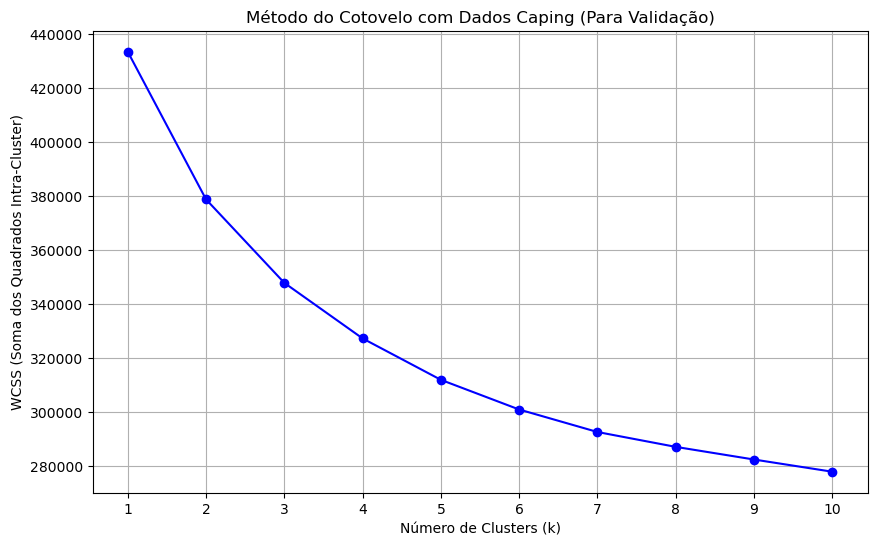

In [83]:
wcss_cap = [] 
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled_cap)
    wcss_cap.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_cap, marker='o', linestyle='-', color='blue')
plt.title('Método do Cotovelo com Dados Caping (Para Validação)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Soma dos Quadrados Intra-Cluster)')
plt.xticks(k_range)
plt.grid(True)
plt.show() # 

k_ideal_cap = 4 

In [84]:
kmeans_final_cap = KMeans(n_clusters=k_ideal_cap, init='k-means++', random_state=42, n_init=10)
cluster_labels_cap = kmeans_final_cap.fit_predict(X_scaled_cap)

df_cap['risk_profile_cluster'] = cluster_labels_cap

In [85]:
features_classificacao_cap = features_para_kmeans + ['risk_profile_cluster']

X_cap_rf = df_cap[features_classificacao_cap]
y_cap_rf = df_cap['Medical Condition'] 

le_cap = LabelEncoder()
y_encoded_cap = le_cap.fit_transform(y_cap_rf)

In [110]:
X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(
    X_cap_rf, y_encoded_cap, test_size=0.2, random_state=42, stratify=y_encoded_cap
)

rf_classifier_cap = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_classifier_cap.fit(X_train_cap, y_train_cap)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [103]:
y_pred_cap = rf_classifier_cap.predict(X_test_cap)

target_names_cap = le_cap.classes_

print("\nAvaliação de Performance:")
print(f"Acurácia Geral: {accuracy_score(y_test_cap, y_pred_cap) * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test_cap, y_pred_cap, target_names=target_names_cap))


Avaliação de Performance:
Acurácia Geral: 90.71%

Relatório de Classificação:
              precision    recall  f1-score   support

   Arthritis       0.79      0.60      0.68       359
      Asthma       0.93      0.89      0.91       407
      Cancer       0.94      0.94      0.94       247
    Diabetes       0.96      0.92      0.94      1284
     Healthy       0.98      1.00      0.99       608
Hypertension       0.86      0.93      0.89      1424
     Obesity       0.87      0.92      0.90       771

    accuracy                           0.91      5100
   macro avg       0.90      0.88      0.89      5100
weighted avg       0.91      0.91      0.91      5100



### Sem K-means

Após a realização dos treinamentos utilizando as clusterizações como uma variável extra, foi feito o treinamento do modelo sem o K-means, para ver como os resultados seriam.

In [88]:
features_base = [
    'Age', 'Gender_Encoded', 'Glucose', 'Blood Pressure', 'BMI', 
    'Oxygen Saturation', 'LengthOfStay', 'Cholesterol', 'Triglycerides', 
    'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score', 
    'Family History', 'Stress Level', 'Sleep Hours'
]

X_base = df[features_base]
y_base_encoded = y_encoded 

In [89]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_base, y_base_encoded, test_size=0.2, random_state=42, stratify=y_base_encoded
)

rf_classifier_base = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_classifier_base.fit(X_train_base, y_train_base)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [102]:
y_pred_base = rf_classifier_base.predict(X_test_base)

target_names_cap = le.classes_ 

print("\nAvaliação de Performance")
print(f"Acurácia Geral: {accuracy_score(y_test_base, y_pred_base) * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test_base, y_pred_base, target_names=target_names_cap))


Avaliação de Performance
Acurácia Geral: 91.22%

Relatório de Classificação:
              precision    recall  f1-score   support

   Arthritis       0.80      0.61      0.69       359
      Asthma       0.93      0.89      0.91       407
      Cancer       0.95      0.94      0.95       247
    Diabetes       0.96      0.94      0.95      1284
     Healthy       0.99      0.99      0.99       608
Hypertension       0.86      0.94      0.90      1424
     Obesity       0.90      0.90      0.90       771

    accuracy                           0.91      5100
   macro avg       0.91      0.89      0.90      5100
weighted avg       0.91      0.91      0.91      5100



#### Após o treinamento do modelo sem a utilização de K-means, os resultados foram melhores

### Matriz de Confusão

A Matriz de Confusão é uma tabela de resumo usada para avaliar o desempenho de modelos de classificação, comparando as previsões do modelo com os valores reais (verdadeiros) dos dados. Ela organiza os resultados em quatro categorias principais (Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos), onde a diagonal principal representa todos os acertos e as células fora da diagonal indicam os erros, mostrando exatamente quais classes o modelo está confundindo.

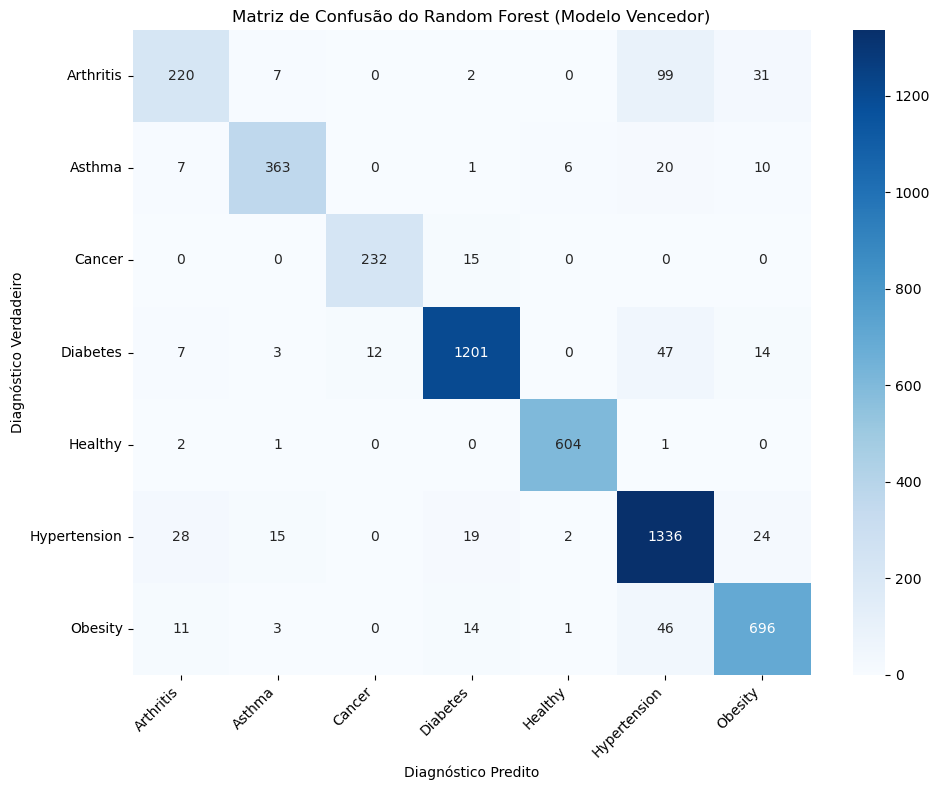

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_base, y_pred_base)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=target_names_cap,yticklabels=target_names_cap)
plt.title('Matriz de Confusão do Random Forest (Modelo Vencedor)')
plt.ylabel('Diagnóstico Verdadeiro')
plt.xlabel('Diagnóstico Predito')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### AUC (Area Under the Curve)

A AUC (Area Under the Curve) é a métrica padrão para avaliar a performance de modelos de classificação que produzem probabilidades, como o Random Forest, fornecendo um valor entre 0 e 1. Ela mede a área total sob a Curva ROC (Receiver Operating Characteristic), que é um gráfico que plota a Taxa de Verdadeiros Positivos (Sensibilidade) versus a Taxa de Falsos Positivos (1 - Especificidade) para todos os limiares de classificação possíveis. Essencialmente, a AUC representa a probabilidade de o modelo classificar corretamente um par aleatório de exemplos (um positivo e um negativo), sendo que valores próximos de 1.0 indicam um poder de distinção excelente entre as classes.

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

classes = np.unique(y_test_base)
y_test_binarized = label_binarize(y_test_base, classes=classes)

y_proba_base = rf_classifier_base.predict_proba(X_test_base)

auc = roc_auc_score(y_test_binarized, y_proba_base, average='micro')


print(f"AUC: {auc:.4f}")

AUC: 0.9944


A AUC do nosso modelo é de 0.9944, um resultado excelente.

##### Avaliando os atributos mais importantes

In [111]:
importances = rf_classifier_base.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features_base,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("10 Principais Fatores de Risco (Random Forest Base)")
print(feature_importance_df.head(10).round(4))

10 Principais Fatores de Risco (Random Forest Base)
              Feature  Importance
9               HbA1c      0.1469
6        LengthOfStay      0.1313
2             Glucose      0.1241
0                 Age      0.0879
12  Physical Activity      0.0879
3      Blood Pressure      0.0878
4                 BMI      0.0699
13         Diet Score      0.0621
5   Oxygen Saturation      0.0443
15       Stress Level      0.0408


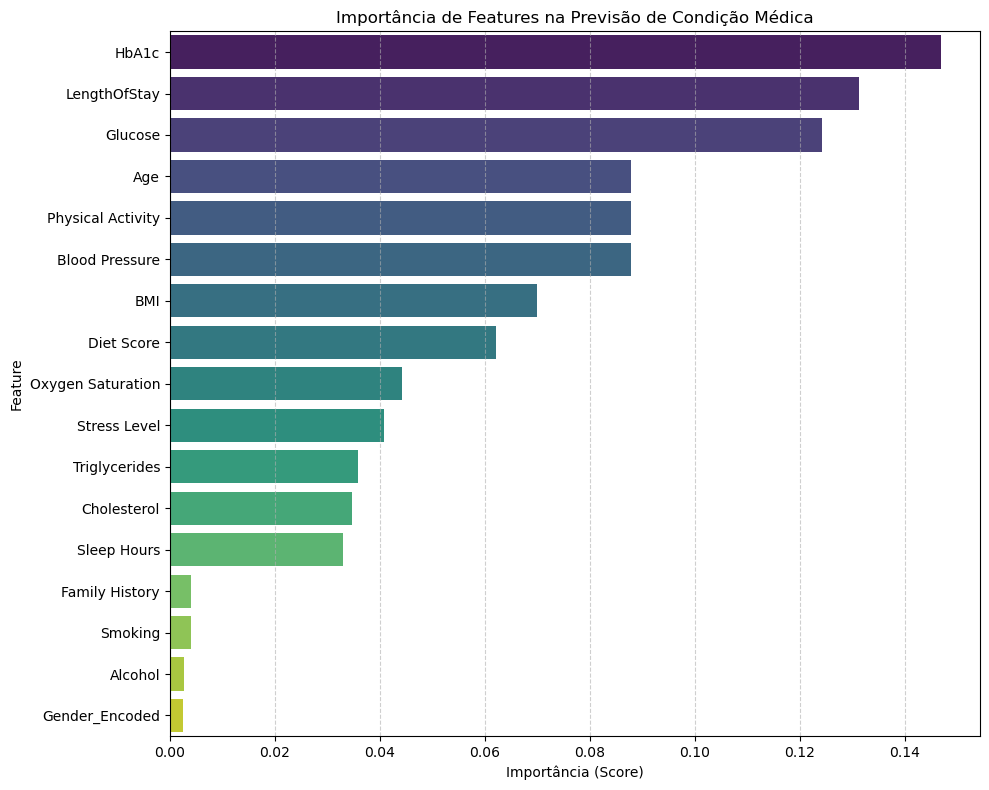

In [96]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature',  legend=False)
plt.title('Importância de Features na Previsão de Condição Médica')
plt.xlabel('Importância (Score)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Preparando os arquivos para o deploy no Streamlit

In [108]:
features_base_nova = [
    'Age', 'Gender_Encoded', 'Glucose', 'Blood Pressure', 'BMI', 
    'Oxygen Saturation', 'LengthOfStay', 'Cholesterol', 'Triglycerides', 
    'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score', 
    'Family History', 'Stress Level', 'Sleep Hours'
]

X_base_novo = df_cap[features_base_nova].copy()

scaler_base_novo = StandardScaler()
X_base_scaled_novo = scaler_base_novo.fit_transform(X_base_novo)

X_train_scaled, _, y_train, _ = train_test_split(
    X_base_scaled_novo, y_encoded_cap, test_size=0.2, random_state=42, stratify=y_encoded_cap
)
rf_classifier_base_novo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier_base_novo.fit(X_train_scaled, y_train)

joblib.dump(rf_classifier_base_novo, 'modelo_random_forest.pkl')
joblib.dump(scaler_base_novo, 'scaler_base.pkl')
joblib.dump(le_cap, 'label_encoder.pkl') 

['label_encoder.pkl']

Os arquivos contendo os modelos foram exportados para serem utilizados pelo app.py